<a href="https://colab.research.google.com/github/ChehrazadElb/PROJET-7-/blob/main/Elbotout_Chehrazad_1_Notebook_010124.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OpenClassrooms - parcours Data Analyst Business Intelligence - P8

# Milestone 1 - Analyse des données

Dans cette partie nous allons analyser le jeu de données que nous avons à notre disposition. Notre objectif est de comprendre les relations entre les variables, et surtout, celles qui influent sur le prix des transactions immobilières. Grâce à ce travail, nous pourrons ne conserver que les variables qui seront utiles à l'apprentissage de notre algorithme.

## 1.Type des données

La première étape à réaliser est d'importer les données dans le notebook et d'opérer des transformations sur les variables si celles-ci s'imposent (exemple : nettoyage ou changement de type des variables, etc.).

In [ ]:
#On importe les librairies que nous utiliserons pour traiter les données et les visualiser
import pandas as pd, numpy as np
# N'oubliez pas d'avoir installé les librairies pandas, numpy et matplotlib via la commande pip

In [ ]:
#On importe les données dans un dataframe
df_historique_immobilier_paris = pd.read_excel ("historique_immobilier_paris_2017_2021_vdef2.xlsx")

Attention, si l'opération ci-dessus ne marche pas, il se peut que le package "openpyxl" ne soit pas présent sur votre ordinateur. Si c'est le cas vous pouvez l'installer en éxécutant la commande : pip install openpyxl ou conda install openpyxl.

In [ ]:
#On vérifie que le type des données attribué par pandas est cohérent
df_historique_immobilier_paris.head(5)

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle
0,2017-01-03,5.505597e+05,8,RUE DES COUTURES SAINT GERVAIS,75003,Paris 3e Arrondissement,2,Appartement,50
1,2017-01-12,1.576492e+06,32,AV MARCEAU,75008,Paris 8e Arrondissement,2,Appartement,163
2,2017-01-10,6.577574e+05,52,RUE DU FAUBOURG SAINT HONORE,75008,Paris 8e Arrondissement,2,Appartement,66
3,2017-01-10,2.500868e+05,64,RUE DU VERTBOIS,75003,Paris 3e Arrondissement,2,Appartement,22
4,2017-01-13,1.762667e+05,25,RUE DES LAVANDIERES STE OPPORT,75001,Paris 1er Arrondissement,2,Appartement,15


### 2. Regardons les différents types de biens immobiliers que nous avons dans nos données :

In [ ]:
print('la liste des différents types de biens immobiliers que nous avons dans les données est ?:')
df_historique_immobilier_paris[['code_type_local', 'type_local']].drop_duplicates()

la liste des différents types de biens immobiliers que nous avons dans les données est ?:


,code_type_local,type_local
0,2,Appartement
18,4,Local industriel. commercial ou assimilé


On observe qu'il y a deux types de biens immobiliers et que leurs codes types sont 2 et 4.



### 3. Nombre de transactions

In [ ]:
#On verifie le nombre de transactions que nous avons dans notre dataframe
print("Le nombre total de transactions dans les données est : {}".format(df_historique_immobilier_paris.shape[0]))
print("Le nombre de transactions pour les appartements dans les données est : {}".format((df_historique_immobilier_paris['type_local'] == 'Appartement').sum()))
print("Le nombre de transactions pour les locaux commerciaux dans les données est : {}".format((df_historique_immobilier_paris['type_local'] == 'Local industriel. commercial ou assimilé').sum()))

Le nombre total de transactions dans les données est : 26196
Le nombre de transactions pour les appartements dans les données est : 24353
Le nombre de transactions pour les locaux commerciaux dans les données est : 1843


### 4. interval de l'historique des données

In [ ]:
#On vérifie également la plage de l'historique disponible
print("La première date de transaction dans l'historique est : {}".format(df_historique_immobilier_paris['date_mutation'].min()))
print("La dernière date de transaction dans l'historique est : {}".format(df_historique_immobilier_paris['date_mutation'].max()))

La première date de transaction dans l'historique est : 2017-01-02 00:00:00
La dernière date de transaction dans l'historique est : 2021-12-31 00:00:00


## Commençons à analyser les données

Maintenant nous allons analyser les données historiques pour les 2 différents types de biens immobiliers en essayant d'identifier les relations entre les variables. Mais avant cela, il nous faudra pouvoir comparer les biens entre eux, et pour cela nous allons créer une colonne du prix au metre carré.

In [ ]:
# Calcul de la colonne
df_historique_immobilier_paris['prix_m2'] = df_historique_immobilier_paris['valeur_fonciere'] / df_historique_immobilier_paris['surface_reelle']
df_historique_immobilier_paris.head()

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle,prix_m2
0,2017-01-03,5.505597e+05,8,RUE DES COUTURES SAINT GERVAIS,75003,Paris 3e Arrondissement,2,Appartement,50,11011.193562
1,2017-01-12,1.576492e+06,32,AV MARCEAU,75008,Paris 8e Arrondissement,2,Appartement,163,9671.732877
2,2017-01-10,6.577574e+05,52,RUE DU FAUBOURG SAINT HONORE,75008,Paris 8e Arrondissement,2,Appartement,66,9966.020548
3,2017-01-10,2.500868e+05,64,RUE DU VERTBOIS,75003,Paris 3e Arrondissement,2,Appartement,22,11367.582877
4,2017-01-13,1.762667e+05,25,RUE DES LAVANDIERES STE OPPORT,75001,Paris 1er Arrondissement,2,Appartement,15,11751.113836


Maintenant, analysons les appartements.

### 5. Evolution du prix au metre carré des appartements dans Paris

In [ ]:
#On retire les colonnes qui sont à priori inutiles ET nous allons nous concentrer sur les appartements dans un premier temps
colonnes_inutiles = ['adresse_nom_voie', 'nom_commune','adresse_nom_voie', 'code_type_local']
df_appartements = df_historique_immobilier_paris.drop(colonnes_inutiles, axis=1)
df_appartements = df_appartements[df_appartements['type_local'] == 'Appartement']
df_appartements.head()

,date_mutation,valeur_fonciere,adresse_numero,code_postal,type_local,surface_reelle,prix_m2
0,2017-01-03,5.505597e+05,8,75003,Appartement,50,11011.193562
1,2017-01-12,1.576492e+06,32,75008,Appartement,163,9671.732877
2,2017-01-10,6.577574e+05,52,75008,Appartement,66,9966.020548
3,2017-01-10,2.500868e+05,64,75003,Appartement,22,11367.582877
4,2017-01-13,1.762667e+05,25,75001,Appartement,15,11751.113836


In [ ]:
#Préparons un dataframe en regroupant les prix moyens de ventes des appartements par année avec la surface moyenne associée
colonnes_selectionnees = ['date_mutation', 'prix_m2','code_postal']
df_vente_appartements = df_appartements[colonnes_selectionnees].copy()
df_vente_appartements['Annee'] = df_vente_appartements['date_mutation'].dt.year
df_vente_appartements = df_vente_appartements.groupby('Annee')['prix_m2'].mean().reset_index()

df_vente_appartements.head()

,Annee,prix_m2
0,2017,9492.859195
1,2018,10031.403432
2,2019,10562.712581
3,2020,10674.872650
4,2021,10455.600126


On constate sur la moyenne des prix de vente des appartements à Paris que ? <br>
Nous allons créer un graphique pour mieux le visualiser.

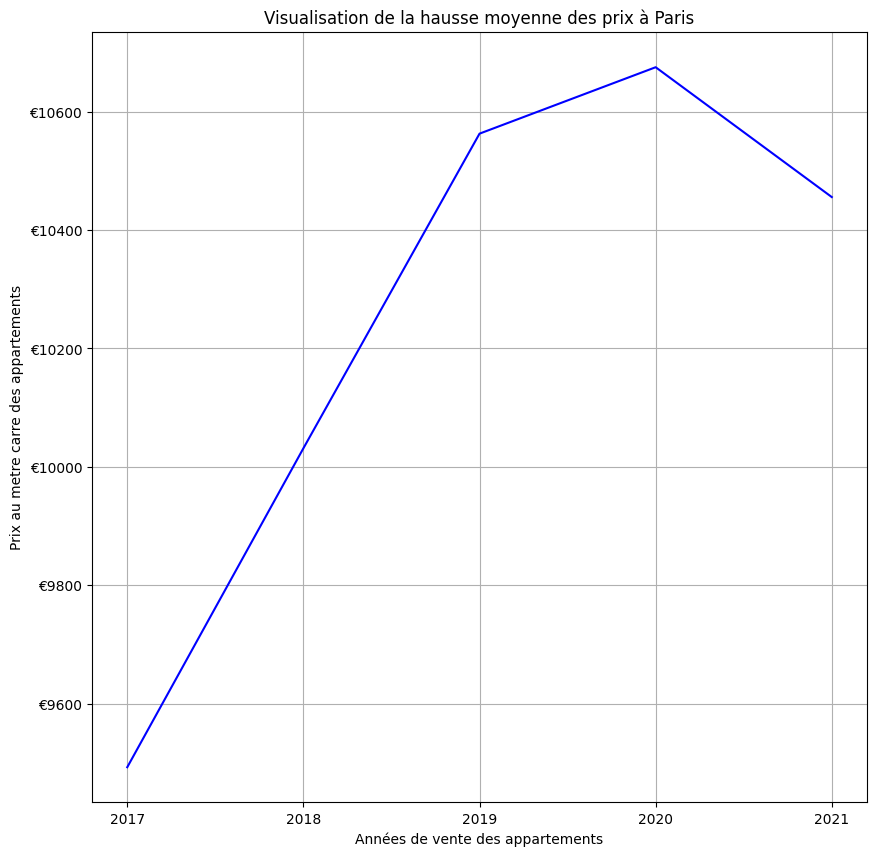

In [ ]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.figure(figsize=(10,10))
plt.plot(['2017','2018','2019','2020','2021'],df_vente_appartements['prix_m2'],color='blue')
plt.xlabel('Années de vente des appartements')
plt.ylabel('Prix au metre carre des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Visualisation de la hausse moyenne des prix à Paris')
plt.show()

### 6. Différences de prix au metre carré entre les arrondissements

Maintenant nous allons chercher à afficher l'évolution des prix par arrondissement. Vérifions la liste des arrondissements que nous avons dans nos données. Normalement à Paris nous avons 20 codes postaux différents, 1 par arrondissement allant de 75001 à 75020.

In [ ]:
#Liste des codes postaux dans nos données.
print("Liste des arrondissements à Paris  :", sorted(df_appartements["code_postal"].unique()))

Liste des arrondissements à Paris  : [75001, 75002, 75003, 75004, 75005, 75006, 75007, 75008, 75009, 75010, 75011, 75012, 75013, 75014, 75015, 75016, 75017, 75018, 75019, 75020]


In [ ]:
#Créeons un dataframe pour une deuxième visualisation avec l'evolution des prix par arrondissement
colonnes_selectionnees = ['date_mutation', 'prix_m2', 'code_postal']
df_appartements_par_arrondissements = df_appartements[colonnes_selectionnees].copy()
df_appartements_par_arrondissements['Annee'] = df_appartements_par_arrondissements['date_mutation'].dt.year
df_appartements_par_arrondissements = df_appartements_par_arrondissements.groupby(['Annee', 'code_postal'])['prix_m2'].mean().reset_index()

df_appartements_par_arrondissements

,Annee,code_postal,prix_m2
0,2017,75001,11762.706289
1,2017,75002,10920.126562
2,2017,75003,11679.818729
3,2017,75004,12407.227522
4,2017,75005,11306.752404
...,...,...,...
95,2021,75016,10790.307817
96,2021,75017,10372.368746
97,2021,75018,9665.640629
98,2021,75019,8828.586057


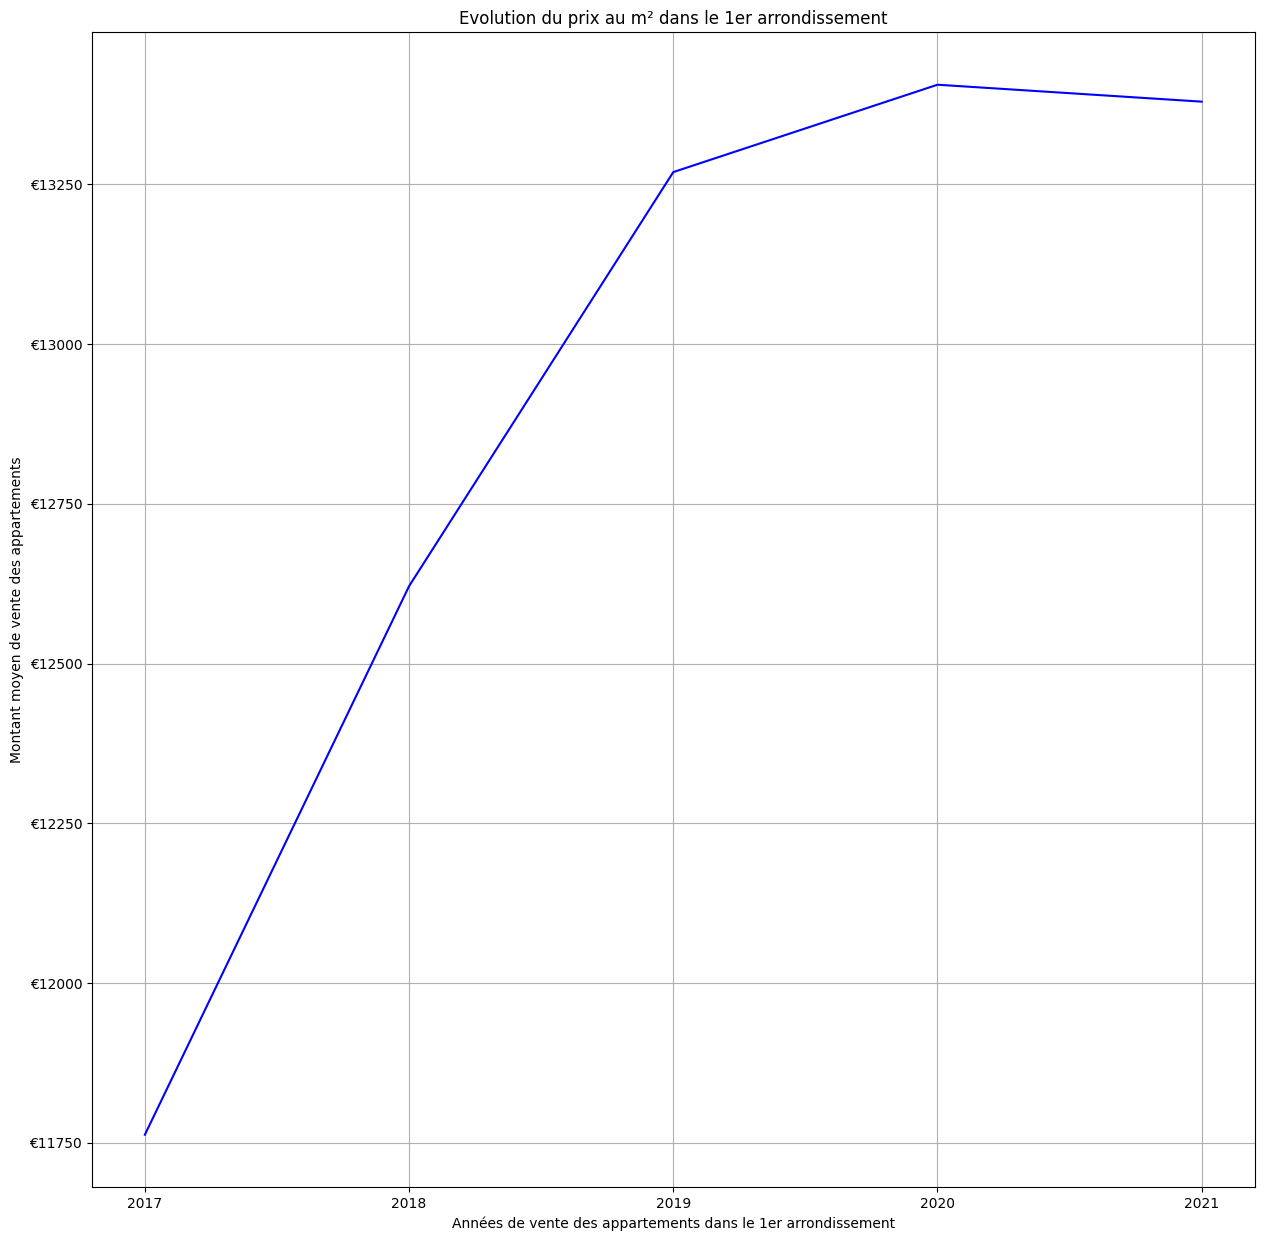

In [ ]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix au metre carré dans le premier arrondissement
plt.figure(figsize=(15,15))
df_75001 = df_appartements_par_arrondissements[df_appartements_par_arrondissements['code_postal'] == 75001]
plt.plot(['2017','2018','2019','2020','2021'], df_75001['prix_m2'], color='blue')
plt.xlabel('Années de vente des appartements dans le 1er arrondissement')
plt.ylabel('Montant moyen de vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution du prix au m² dans le 1er arrondissement')
plt.show()

Nous allons ajouter à cette visualisation tous les autres arrondissement avec une couleur différente.

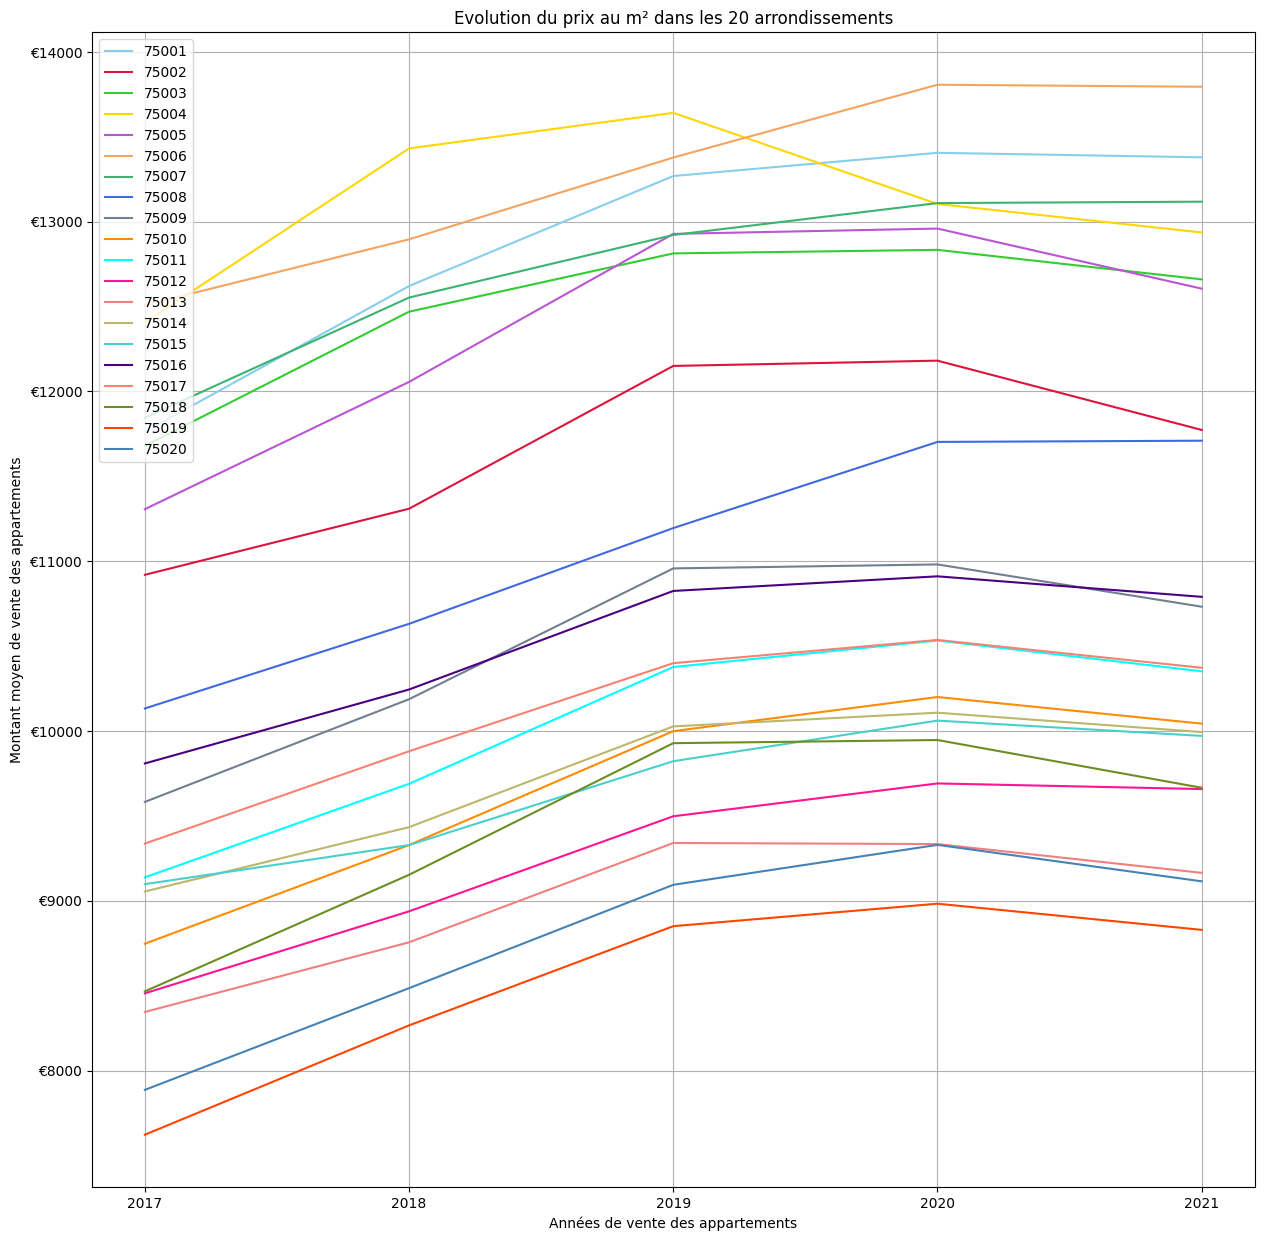

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure(figsize=(15,15))
interval_historique=['2017','2018','2019','2020','2021']
#Insérer les lignes à tracer ci-dessous
couleurs_arrondissements = ['skyblue', 'crimson', 'limegreen', 'gold', 'mediumorchid', 'sandybrown', 'mediumseagreen', 'royalblue', 'slategray', 'darkorange', 'cyan', 'deeppink', 'lightcoral', 'darkkhaki', 'mediumturquoise', 'indigo', 'salmon', 'olivedrab', 'orangered', 'steelblue']
codes_postaux = sorted(df_appartements_par_arrondissements['code_postal'].unique())
for code_postal, couleur in zip(codes_postaux, couleurs_arrondissements):
    plt.plot(interval_historique, df_appartements_par_arrondissements.loc[df_appartements_par_arrondissements['code_postal'] == code_postal]['prix_m2'], color=couleur, label=f'{code_postal}')
plt.xlabel('Années de vente des appartements')
plt.ylabel('Montant moyen de vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution du prix au m² dans les 20 arrondissements')
plt.legend(loc='upper left')
plt.show()

On observe que globalement que une hausse des prix au m2 dans tous les arrondissements, jusqu'en 2019. Puis on constate que les prix se stabilisent et baissent légèrement entre 2020 et 2021.

### 7. Prix au metre carré par transaction dans un arrondissement

In [ ]:
#Vérifions le nombre de transaction dans le 6ème car le prix semble élevé
transactions_6e = df_appartements[df_appartements['code_postal'] == 75006]
nombre_transactions_6e = transactions_6e.shape[0]
print(f'Le nombre de transactions dans le 6e arrondissement est : {nombre_transactions_6e}')

Le nombre de transactions dans le 6e arrondissement est : 709


On constate que le 6ème arrondissement est le plus cher.

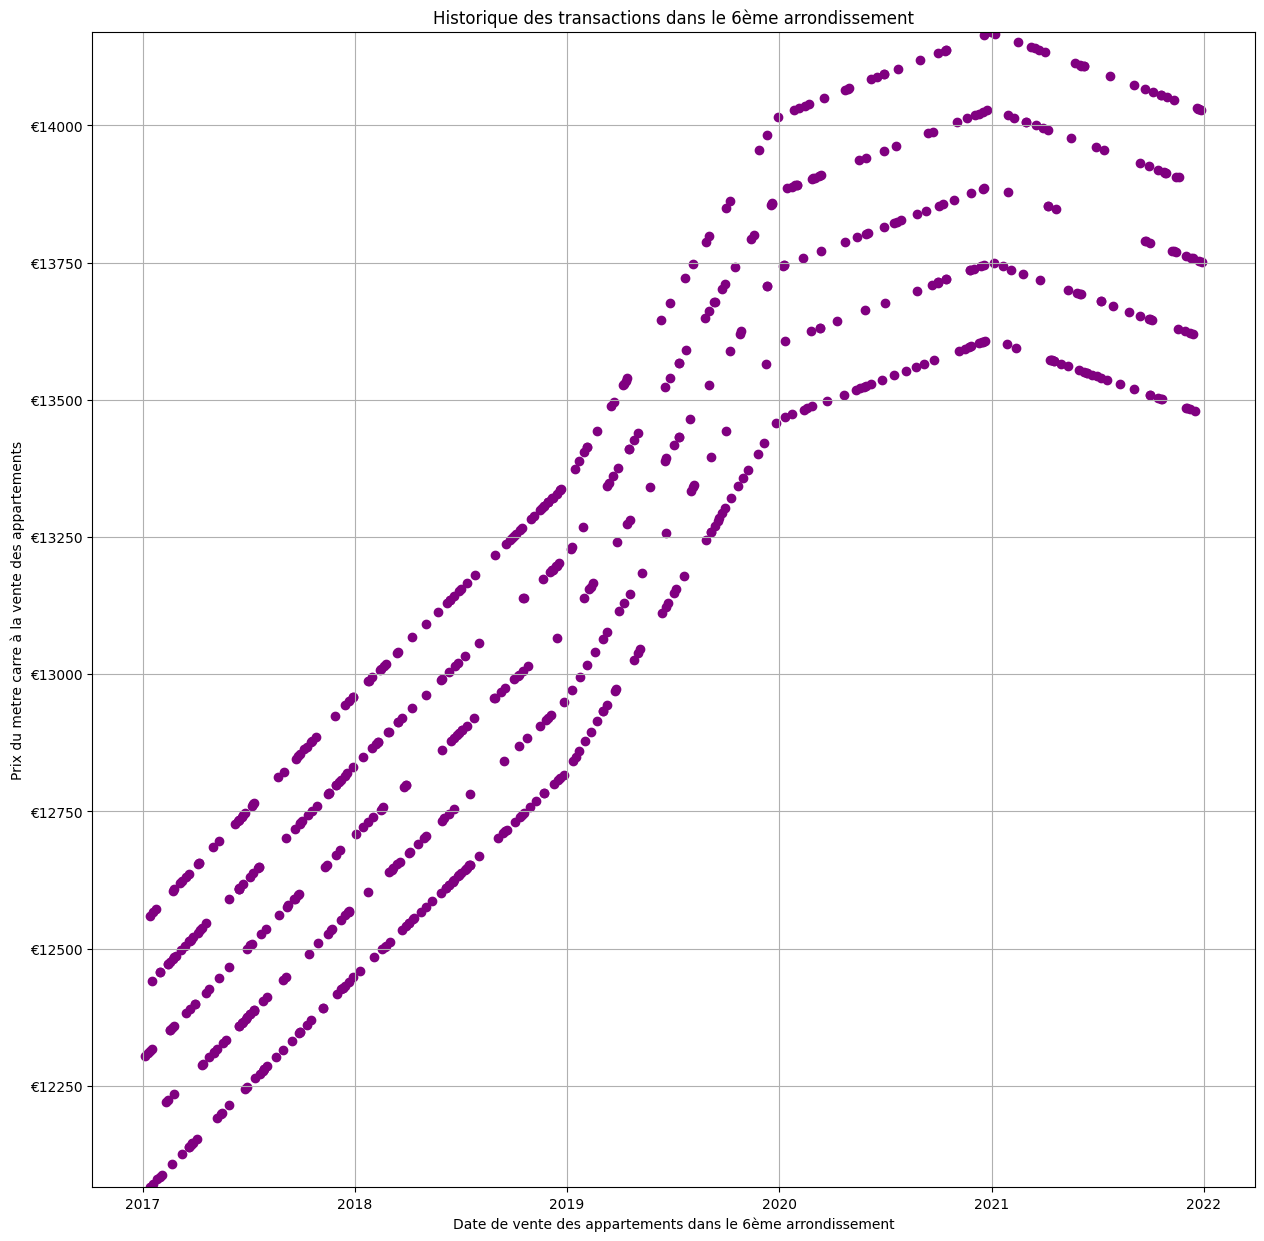

In [ ]:
cp=75006
plt.figure(figsize=(15,15))
#Insérer ci-dessous le scatter plot
plt.scatter(transactions_6e['date_mutation'], transactions_6e['prix_m2'], color='purple')
plt.xlabel('Date de vente des appartements dans le 6ème arrondissement')
plt.ylabel('Prix du metre carre à la vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.ylim(transactions_6e['prix_m2'].min(), transactions_6e['prix_m2'].max())
plt.grid(which='both')
plt.title('Historique des transactions dans le 6ème arrondissement')
plt.show()

On observe que toutes les transactions suivent la même tendance.

Pour nous rassurer sur la relation entre les données nous allons utiliser un test statistique de corrélation.

### 8. Vérification de la relation entre le prix au m² et la date dans le 6ème arrondissement par le calcul du coefficient de corrélation de Pearson

Pour cette distribution nous allons calculer le coefficient de corrélation de Pearson. La relation entre le prix au metre carré et la date n'est pas forcément linéaire mais elle s'en rapproche suffisamment pour que cette analyse soit pertinente (voir l'évolution du prix au metre carré globale montrée plus haut, on a presque une droite sauf entre 2020 et 2021). Ce qui nous interesse c'est de prouver que le temps a une influence sur le prix.

In [ ]:
#On calcule la corrélation de Spearman
from scipy import stats
from scipy.stats import spearmanr

df_appartements['date_mutation'] = pd.to_datetime(df_appartements['date_mutation'])
df_appartements['timestamp'] = df_appartements['date_mutation'].astype('int64') / (10**9)
correlation, p_value = spearmanr(df_appartements.loc[df_appartements['code_postal']==75006]['prix_m2'], df_appartements.loc[df_appartements['code_postal']==75006]['timestamp'])
print(f"Le coefficient de corrélation est de : {correlation}")
print(f"La p-value est : {p_value}")

Le coefficient de corrélation est de : 0.9148449773186671
La p-value est : 1.1999820574651415e-280


Le coefficient de corrélation de Spearman est de 0.9148, ce qui indique une forte corrélation positive entre le prix au mètre carré et la date.
La p-value est de 1,2, ce qui indique que la corrélation observée est très peu probablement le résultat du hasard.

### 9. Vérification de la relation entre la valeur fonciere et la surface

In [ ]:
correlation, p_value = spearmanr(df_appartements.loc[df_appartements['code_postal']==75006]['surface_reelle'], df_appartements.loc[df_appartements['code_postal']==75006]['valeur_fonciere'])
print(f"Le coefficient de corrélation est de : {correlation}")
print(f"La p-value est : {p_value}")

Le coefficient de corrélation est de : 0.9977685406899677
La p-value est : 0.0


Le coefficient de corrélation est de 1 avec une pvalue de 0. La relation est donc confirmée.

Regardons maintenant si le type de bien à une influence sur le prix au metre carré également.

### 10. Analyse des locaux industriels, commerciaux et assimilés

In [ ]:
#On crée un dataset qui ne contient que les locaux commerciaux
colonnes_a_supprimer = ['adresse_numero', 'adresse_nom_voie', 'code_type_local', 'nom_commune']
df_locaux = df_historique_immobilier_paris.drop(columns=colonnes_a_supprimer)
locaux = df_historique_immobilier_paris['code_type_local'] == 4
df_locaux = df_locaux[locaux]
df_locaux.head(5)

,date_mutation,valeur_fonciere,code_postal,type_local,surface_reelle,prix_m2
18,2017-02-01,3.113277e+06,75003,Local industriel. commercial ou assimilé,250,12453.109192
29,2017-02-17,1.164375e+06,75003,Local industriel. commercial ou assimilé,95,12256.581685
34,2017-02-20,3.802522e+05,75003,Local industriel. commercial ou assimilé,31,12266.199603
91,2017-03-09,3.623842e+05,75001,Local industriel. commercial ou assimilé,29,12496.006027
109,2017-03-29,3.159072e+05,75003,Local industriel. commercial ou assimilé,25,12636.289027


In [ ]:
#Préparons un dataframe en regroupant les prix au metre carré moyens des ventes par année

colonnes_selectionnees = ['date_mutation', 'prix_m2']
df_locaux_2 = df_locaux[colonnes_selectionnees].copy()
df_locaux_2['Annee'] = df_locaux_2['date_mutation'].dt.year
df_locaux_2 = df_locaux_2.groupby('Annee')['prix_m2'].mean().reset_index()
df_locaux_2.head(5)

,Annee,prix_m2
0,2017,10949.909217
1,2018,11569.499180
2,2019,11960.132050
3,2020,11966.470204
4,2021,12006.488691


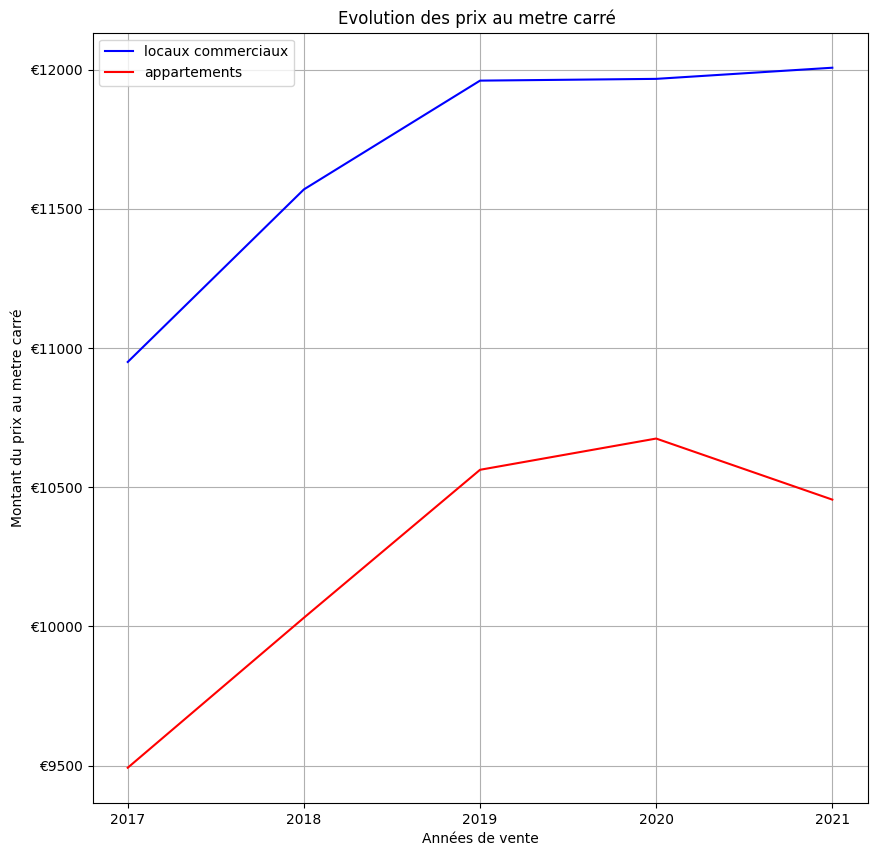

In [ ]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix
plt.figure(figsize=(10,10))
plt.plot(['2017','2018','2019','2020','2021'],df_locaux_2['prix_m2'],label='locaux commerciaux',color='blue')
plt.plot(['2017','2018','2019','2020','2021'],df_vente_appartements['prix_m2'],label='appartements',color='red')
plt.xlabel('Années de vente')
plt.ylabel('Montant du prix au metre carré')
plt.legend()
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution des prix au metre carré ')
plt.show()

Le prix au metre carré des locaux commerciaux est plus elevé que le prix des appartements mais suit globalement la même évolution dans le temps.


Après ces analyses, nous pouvons conclure que les dimensions à utiliser pour prédire le prix au m² sont :
- la surface du bien immobilier,
- la date considérée,
- la localisation (code_postal),
- le type de bien.

# Milestone 2 - Entraînement de l'algorithme

Dans cette section nous allons maintenant entrâiner un algorithme à prédire la valeur fonciere d'un bien immobilier. Pour cela nous allons utiliser l'algorithme de régression linéaire.

On commence par préparer nos données en transformant les colonnes catégoriques du code postal et du type de local grâce au one hot encoder (sklearn) / get_dummies (pandas)

In [ ]:
df_selected = df_historique_immobilier_paris[['code_postal', 'type_local', 'date_mutation', 'surface_reelle', 'valeur_fonciere']]
df_encoded = pd.get_dummies(df_selected, columns=['code_postal', 'type_local'])
df_encoded['timestamp'] = pd.to_datetime(df_encoded['date_mutation']).astype(int) // 10**9
df_encoded.drop('date_mutation', axis=1, inplace=True)
df_encoded.head()

,surface_reelle,valeur_fonciere,code_postal_75001,code_postal_75002,code_postal_75003,code_postal_75004,code_postal_75005,code_postal_75006,code_postal_75007,code_postal_75008,...,code_postal_75014,code_postal_75015,code_postal_75016,code_postal_75017,code_postal_75018,code_postal_75019,code_postal_75020,type_local_Appartement,type_local_Local industriel. commercial ou assimilé,timestamp
0,50,5.505597e+05,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1483401600
1,163,1.576492e+06,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1484179200
2,66,6.577574e+05,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1484006400
3,22,2.500868e+05,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1484006400
4,15,1.762667e+05,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1484265600


On utilise le train_test_split pour prélever un tiers de nos données (33%) et les garder de côté. Nous allons entraîner notre algorithme sur le reste des données et puis mesurer notre erreur moyenne en pourcentage de la valeur foncière

In [ ]:
# On importe le train test split de la librairie sk_learn
from sklearn.model_selection import train_test_split
# La valeur y à trouver est la valeur foncière
X = df_encoded[['surface_reelle', 'code_postal_75001', 'code_postal_75002', 'code_postal_75003', 'code_postal_75004',
                'code_postal_75005', 'code_postal_75006', 'code_postal_75007', 'code_postal_75008', 'code_postal_75009',
                'code_postal_75010', 'code_postal_75011', 'code_postal_75012', 'code_postal_75013', 'code_postal_75014',
                'code_postal_75015', 'code_postal_75016', 'code_postal_75017', 'code_postal_75018', 'code_postal_75019',
                'code_postal_75020', 'type_local_Appartement', 'type_local_Local industriel. commercial ou assimilé',
                'timestamp']]
y = df_encoded['valeur_fonciere']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=6)

In [ ]:
# On importe le train test split de la librairie sk_learn
from sklearn.model_selection import train_test_split
# La valeur y à trouver est la valeur foncière
X = df_encoded.drop('valeur_fonciere', axis=1)
y = df_encoded['valeur_fonciere']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=6)

In [ ]:
#conversion des données en str
df_encoded = df_encoded.astype(str)

In [ ]:
#On entraîne l'algorithme ci-dessous et on effectue la prédiction
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
relative_error = (mae / y_test.mean()) * 100

print(f'Erreur relative moyenne en pourcentage : {relative_error:.2f}%')


Erreur relative moyenne en pourcentage : 6.84%


Notre algorithme fait donc 6,84% d'erreur en moyenne sur la prédiction de la valeur foncière.

Mes conclusions sur ce résultat et comment j'aurais pu aller plus loin :
- Une erreur relative moyenne de 6,84% sur la prédiction me semble être faible et acceptable.
- Pour obtenir un meilleur résultat nous pourrions jouer sur les paramètres de l'algorithme.
- Pour aller plus loin nous pourrions augmenter le nombre d'observations.
- Nous pourrions également utiliser un algorythme différent et voir lequel obtient le pourcentage le plus faible.

# Milestone 3 - Prédiction définitive pour le client

Nous avons récupéré le fichier avec le portefeuille des actifs de la société. Nous allons l'importer puis effectuer la prédiction et statuer sur la branche qui, selon notre prédiction, aura le plus de valeur à la date demandée c'est à dire au 31 décembre 2022.<br>
Petite précision, nous souhaitons continuer à utiliser la surface réelle pour faire les calculs et pas la surface carrez.

In [ ]:
#On importe les données dans un dataframe
df_portefeuille=pd.read_excel('portefeuille_actifs+(3).xlsx')
df_portefeuille.head()

,adresse_numero,adresse_nom_voie,code_postal,code_commune,nom_commune,surface_carrez,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude
0,127,RUE SAINT-DENIS,75001,75101,Paris 1er Arrondissement,16.41,2,Appartement,25,1,2.349593,48.863227
1,62,RUE NOTRE-DAME DE NAZARETH,75003,75103,Paris 3e Arrondissement,20.47,2,Appartement,22,1,2.356977,48.867907
2,62,RUE DE TURENNE,75003,75103,Paris 3e Arrondissement,64.48,2,Appartement,65,3,2.364855,48.859318
3,32,AV GEORGE V,75008,75108,Paris 8e Arrondissement,63.29,2,Appartement,74,2,2.301586,48.868893
4,152,BD HAUSSMANN,75008,75108,Paris 8e Arrondissement,20.58,2,Appartement,22,1,2.311643,48.875490


Nous avons la liste des biens immobiliers de l'entreprise. Pour effectuer une prédiction, nous devons mettre ce fichier au même format que le dataframe que nous avons utilisé lors de l'entraînement de l'algorithme.

In [ ]:
#On réutilise les mêmes fonctions pour faire le one hot encoding des variables catégorielles
import pandas as pd
import datetime as dt

df_selected = df_portefeuille[['code_postal', 'type_local', 'surface_reelle_bati']]
portefeuille_encoding = pd.get_dummies(df_selected, columns=['code_postal', 'type_local'])
portefeuille_encoding['timestamp'] = int(dt.datetime(2022, 12, 31).timestamp())
portefeuille_encoding.rename(columns={'surface_reelle_bati': 'surface_reelle'}, inplace=True)

portefeuille_encoding.head(5)
#On importe la librairie datetime pour pouvoir créer une colonne timestamp avec la date du 31 décembre 2022 pour la prédiction



,surface_reelle,code_postal_75001,code_postal_75002,code_postal_75003,code_postal_75004,code_postal_75005,code_postal_75006,code_postal_75007,code_postal_75008,code_postal_75009,...,code_postal_75014,code_postal_75015,code_postal_75016,code_postal_75017,code_postal_75018,code_postal_75019,code_postal_75020,type_local_Appartement,type_local_Local industriel. commercial ou assimilé,timestamp
0,25,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1672444800
1,22,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1672444800
2,65,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1672444800
3,74,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1672444800
4,22,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1672444800


In [ ]:
#Conversion du dataframe en str
portefeuille_encoding = portefeuille_encoding.astype(str)

Notre dataframe est prêt à être utilisé par notre algorithme de prédiction.

In [ ]:
#On effectue la prédiction
pred_portefeuille = model.predict(portefeuille_encoding)
#On vérifie les 10 premières valeurs
print("Les 10 premières valeurs prédites pour le portefeuille:")
print(pred_portefeuille[:10])


Les 10 premières valeurs prédites pour le portefeuille:
[433567.9304972  372408.97886016 820218.57406597 884292.83694767
 342755.65204761 478139.94827262 393237.33212555 640196.15514178
 149121.45756542 147768.51309116]


Maintenant nous allons comparer la valorisation prédite pour les deux segments.

In [ ]:
# Ajouter une colonne "prediction" avec les valeurs prédites
portefeuille_encoding['prediction'] = pred_portefeuille

(portefeuille_encoding.head(10))

,surface_reelle,code_postal_75001,code_postal_75002,code_postal_75003,code_postal_75004,code_postal_75005,code_postal_75006,code_postal_75007,code_postal_75008,code_postal_75009,...,code_postal_75015,code_postal_75016,code_postal_75017,code_postal_75018,code_postal_75019,code_postal_75020,type_local_Appartement,type_local_Local industriel. commercial ou assimilé,timestamp,prediction
0,25,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1672444800,433567.930497
1,22,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1672444800,372408.978860
2,65,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1672444800,820218.574066
3,74,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1672444800,884292.836948
4,22,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1672444800,342755.652048
5,35,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1672444800,478139.948273
6,24,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1672444800,393237.332126
7,60,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1672444800,640196.155142
8,11,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1672444800,149121.457565
9,13,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1672444800,147768.513091


In [ ]:
valorisation_particuliers = portefeuille_encoding[portefeuille_encoding['type_local_Appartement'] == '1']['prediction'].sum()
valorisation_particuliers_millions = valorisation_particuliers / 10**6
print('La valorisation du segment particulier est (en millions d\'euros):', valorisation_particuliers_millions)

La valorisation du segment particulier est (en millions d'euros): 71.23716021262021


In [ ]:
#Valorisation du portefeuille sur le segment corporate
valorisation_corporate = portefeuille_encoding[portefeuille_encoding['type_local_Local industriel. commercial ou assimilé'] == '1']['prediction'].sum()
valorisation_corporate_millions = valorisation_corporate / 10**6
print('La valorisation du segment corporate est (en millions d\'euros):', valorisation_corporate_millions)

La valorisation du segment corporate est (en millions d'euros): 98.3191284729584


Mes conclusions sur le segment avec la plus grande valorisation et sur les limites de cette estimation :
- Le segment corporate a une valorisation nettement supérieure à celle du segment particulier, avec environ 98,32 millions d'euros comparativement à environ 71,24 millions d'euros pour le segment particulier.
- Les estimations sont basées sur les données disponibles au moment de l'entraînement du modèle, les conditions du marché peuvent évoluer, ce qui peut affecter la précision des estimations.
- Les prédictions du modèle peuvent ne pas capturer toutes les nuances du marché immobilier.

# Milestone 4 - Classification des données issues du jeu de test

Dans cette partie nous allons labelliser automatiquement les biens immobiliers comme étant :
- soit des Appartements
- soit des Local industriel. commercial ou assimilé
Pour cela nous allons utiliser l'algorithme du KMeans sur le jeu de données partagé par l'entreprise.

Pour que l'algorithme fonctionne, il faut que nous préparions les données en supprimant les dimensions inutiles et en nous concentrant sur le facteur discriminant entre les appartements et les locaux commerciaux : la différence dans le prix au mètre carré tel que nous l'avons vu avant.

In [ ]:
#On importe les données dans un dataframe
df_opportunite=pd.read_excel('echantillon_a_classer2.xlsx')
df_opportunite.head()

,valeur_fonciere,code_postal,nom_commune,surface_reelle
0,868687.083271,75019,Paris 19e Arrondissement,88
1,452050.762192,75019,Paris 19e Arrondissement,45
2,193088.653587,75019,Paris 19e Arrondissement,21
3,303012.549370,75019,Paris 19e Arrondissement,32
4,149272.200110,75019,Paris 19e Arrondissement,20


On applique les transformations nécessaires. Tout d'abord nous allons calculer le prix au mètre carré en divisant la valeur foncière par la surface. Ensuite nous allons retirer ces colonnes car nous avons déjà l'information qu'elles contiennent dans la dimension prix au mètre carré désormais.

Enfin toutes nos données sont de l'année 2021. Nous allons retirer cette dimension qui ne devrait pas être discriminante dans le regroupement des données.

In [ ]:
df_opportunite_2 = df_opportunite.copy()
df_opportunite_2['prix_m2'] = df_opportunite_2['valeur_fonciere'] / df_opportunite_2['surface_reelle']
colonnes_a_supprimer = ['valeur_fonciere', 'nom_commune', 'surface_reelle']
df_opportunite_2 = df_opportunite_2.drop(columns=colonnes_a_supprimer)
df_opportunite_2.head()

,code_postal,prix_m2
0,75019,9871.444128
1,75019,10045.572493
2,75019,9194.697790
3,75019,9469.142168
4,75019,7463.610005


Nous observons dans les données que nous avons des valeurs différentes de prix au mètre carré pour un même arrondissement (ici le 19ème arrondissement). Il se peut fort que cela soit notre dimension à utiliser pour attribuer les prix au mètre carré les plus élévé dans un département aux locaux commerciaux, et les prix les plus bas aux appartements.

Pour effectuer cette opération, nous allons utiliser l'algorithme du Kmeans qui va rechercher 2 centroïdes à travers les données.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

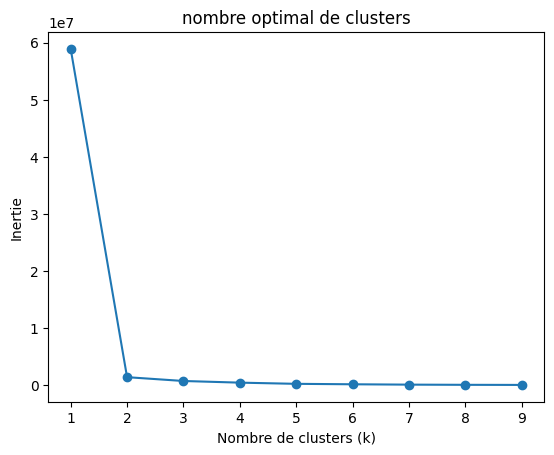

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans

X = df_opportunite_2[['prix_m2']]
inertia = []
k_list = range(1, 10)
for k in k_list:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(k_list, inertia, marker='o')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.title('nombre optimal de clusters')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=2, n_init=10, random_state=0)
prediction_labellisation = kmeans.fit_predict(df_opportunite_2)


In [ ]:
df_opportunite_2['prediction_label'] = prediction_labellisation

In [ ]:
#On vérifie les données de la prédiction
df_opportunite_2

,code_postal,prix_m2,prediction_label
0,75019,9871.444128,0
1,75019,10045.572493,0
2,75019,9194.697790,0
3,75019,9469.142168,0
4,75019,7463.610005,1
5,75019,9982.016919,0
6,75019,9674.262777,0
7,75019,7348.917415,1
8,75019,9789.051438,0
9,75019,7616.420959,1


Nous avons obtenu notre prédiction. Nous pouvons changer les labels et remplacer les valeurs à 0 par Local industriel. commercial ou assimilé et les valeurs à +1 par Appartement.

In [ ]:
#On affiche les résultats
df_opportunite_2['prediction_label'] = df_opportunite_2['prediction_label'].replace({0: 'locaux', 1: 'appartements'})
df_opportunite_2_sorted = df_opportunite_2.sort_values(by='prix_m2', ascending=False)
print(df_opportunite_2_sorted)

    code_postal       prix_m2 prediction_label
32        75019  10113.195822           locaux
27        75019  10103.161577           locaux
1         75019  10045.572493           locaux
38        75019   9983.591800           locaux
5         75019   9982.016919           locaux
18        75019   9978.784822           locaux
26        75019   9961.146860           locaux
17        75019   9949.544452           locaux
0         75019   9871.444128           locaux
13        75019   9869.462342           locaux
22        75019   9815.972258           locaux
8         75019   9789.051438           locaux
39        75019   9771.486096           locaux
30        75019   9734.720495           locaux
36        75019   9715.531658           locaux
6         75019   9674.262777           locaux
28        75019   9597.631488           locaux
11        75019   9518.076103           locaux
3         75019   9469.142168           locaux
2         75019   9194.697790           locaux
31        750

# Milestone 5 - Analyse et présentation des résultats

Notre analyse de l'évolution des prix de l'immobilier consiste à utiliser des modèles, tels que la corrélation de Spearman et la régression linéaire, pour prédire les prix immobiliers en fonction de diverses caractéristiques, telles que la surface, le type de bien, la date, etc..

Cette analyse nécessitait la préparation des données, la sélection des caractéristiques pertinentes, la division des données en ensembles d'entraînement et de test, l'entraînement de l'algorithme et l'évaluation de sa performance à l'aide de mesures telles que le pourcentage d'erreur moyen.

Nous réalisons toutes ces analyses de corrélation avec l'objectif de trouver les variables qui vont nous permettre de prédire le plus justement possible la valeur des appartements et des locaux commerciaux à Paris.

L'exercice d'analyse de clustering avait pour objectif de labéliser les prix au m2 et les mettre dans la bonne catégorie de biens immobiliers.

Nous avons utilisé des visualisations, telles que des graphiques de dispersion, des graphiques en courbe, et la courbe de coude pour comprendre les données et les résultats des modèles.
